# SIR with two age groups
This is the Python version of program 3.3 from page 79 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters (rates here are specified in terms of years)

lC=0.066667 #rate at which children mature
mu=[0.0, 0.0166667] #natural death rate
beta=np.array([100.0, 10.0, 10.0, 20.0]) #transmission  rate
gamma=10.0 #recovery rate
n0=mu[1]/(lC+mu[1])  #initial proportion in the childhood group
n1=1.0-n0  #intial proportion in adult class
n=np.array([n0,n1]) #initial populations proportions
nu=(lC+mu[1])*n[0] #birth rate (into childhood class)

TS=0.01 #time step
ND=MaxTime=100 #number of years

S0=[0.1, 0.1] #initial susceptibles
I0=[0.0001, 0.0001]  #initial infectec
INPUT=np.hstack((S0,I0)) #initial conditions


In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP    
	Y[0] = nu - (beta[0] * V[2] + beta[2] * V[3]) * V[0] - mu[0] * V[0] - lC * V[0]
	Y[1] = lC * V[0] - (beta[1]*V[2] + beta[3]*V[3]) * V[1] - mu[1] * V[1]
	Y[2] = (beta[0] * V[2] + beta[2] * V[3]) * V[0] - gamma * V[2] - mu[0] * V[2] - lC * V[2]
	Y[3] = (beta[1]*V[2] + beta[3]*V[3]) * V[1] - gamma * V[3] - mu[1] * V[3]
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

In [13]:
time=[]
for i in range(10001):
    time.append(i*0.01)

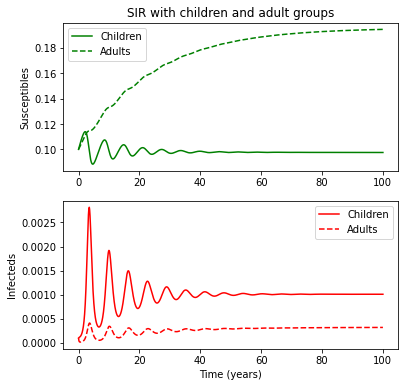

In [14]:
#Ploting
fig = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('SIR with children and adult groups')
fig.add_subplot(211)
plt.plot(time,RES[:,0], '-g', label='Children')
plt.plot(time,RES[:,1], '--g', label='Adults')
plt.legend(loc=0)
plt.ylabel('Susceptibles')
fig.add_subplot(212)
plt.plot(time,RES[:,2], '-r', label='Children')
plt.plot(time,RES[:,3], '--r', label='Adults')
plt.legend(loc=0)
plt.xlabel('Time (years)')
plt.ylabel('Infecteds')
plt.show()
fig.savefig('SIR_two_age_groups.pdf')